**Question 6: Isocontours of Normal Distributions**

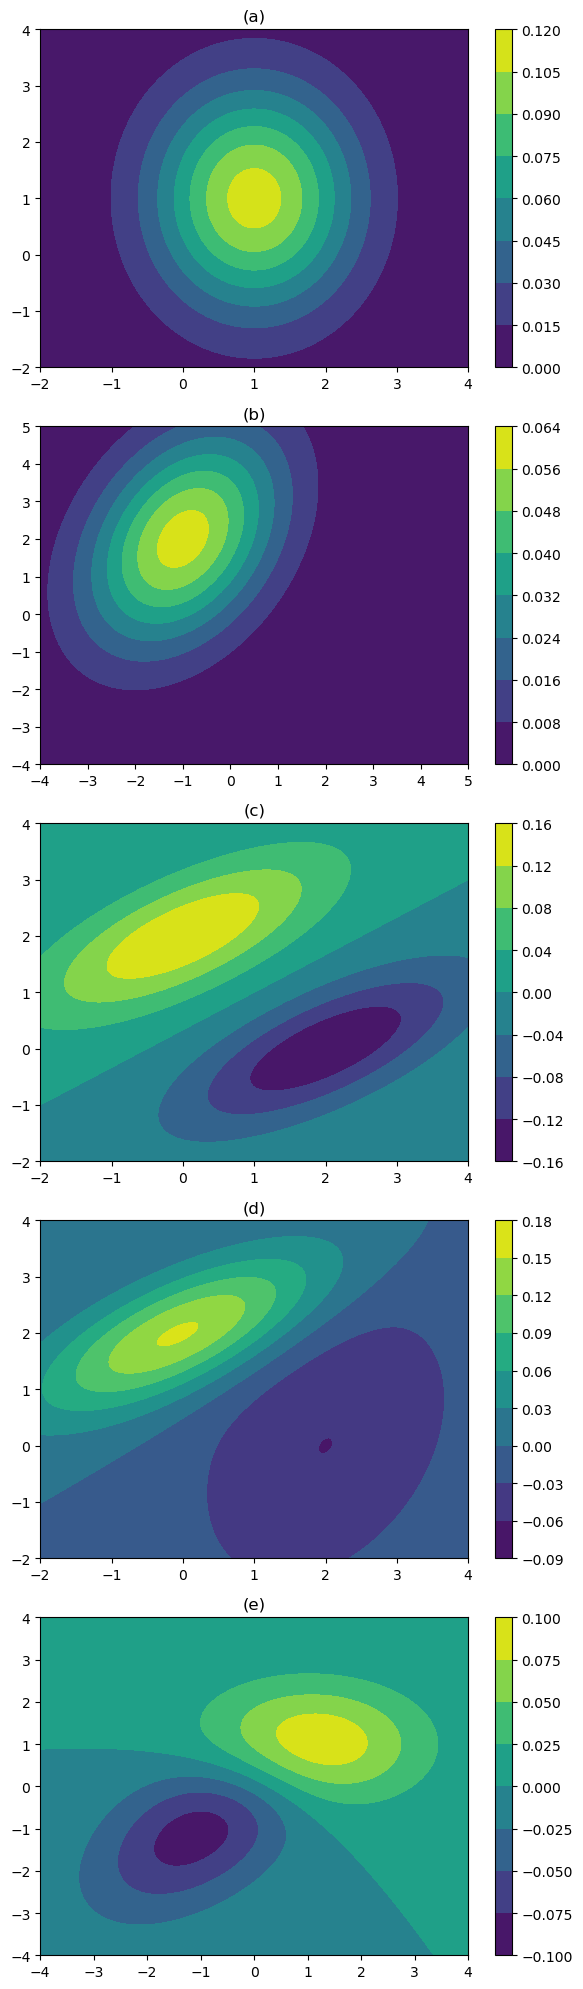

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_contours(mu, Sigma, title, ax, mesh_x, mesh_y):
    x, y = np.meshgrid(mesh_x, mesh_y)
    pos = np.dstack((x, y))
    rv = multivariate_normal(mu, Sigma)
    z = rv.pdf(pos)
    c = ax.contourf(x, y, z)
    plt.colorbar(c, ax=ax)
    ax.set_title(title)

def plot_difference(mu1, Sigma1, mu2, Sigma2, title, ax, mesh_x, mesh_y):
    x, y = np.meshgrid(mesh_x, mesh_y)
    pos = np.dstack((x, y))
    rv1 = multivariate_normal(mu1, Sigma1)
    rv2 = multivariate_normal(mu2, Sigma2)
    
    diff = rv1.pdf(pos) - rv2.pdf(pos)
    c = ax.contourf(x, y, diff)
    plt.colorbar(c, ax=ax)
    ax.set_title(title)

fig, axes = plt.subplots(5, 1, figsize=(6, 20))

# Part (1)
mesh_x = np.linspace(-2, 4, 500)
mesh_y = np.linspace(-2, 4, 500)
plot_contours(mu=[1, 1], Sigma=[[1, 0], [0, 2]], title="(a)", ax=axes[0], mesh_x=mesh_x, mesh_y=mesh_y)

# Part (2)
mesh_x = np.linspace(-4, 5, 500)
mesh_y = np.linspace(-4, 5, 500)
plot_contours(mu=[-1, 2], Sigma=[[2, 1], [1, 4]], title="(b)", ax=axes[1], mesh_x=mesh_x, mesh_y=mesh_y)

# Part (3)
mesh_x = np.linspace(-2, 4, 500)
mesh_y = np.linspace(-2, 4, 500)
plot_difference(mu1=[0, 2], Sigma1=[[2, 1], [1, 1]], mu2=[2, 0], Sigma2=[[2, 1], [1, 1]], title="(c)", ax=axes[2], mesh_x=mesh_x, mesh_y=mesh_y)

# Part (4)
mesh_x = np.linspace(-2, 4, 500)
mesh_y = np.linspace(-2, 4, 500)
plot_difference(mu1=[0, 2], Sigma1=[[2, 1], [1, 1]], mu2=[2, 0], Sigma2=[[2, 1], [1, 4]], title="(d)", ax=axes[3], mesh_x=mesh_x, mesh_y=mesh_y)

# Part (5)
mesh_x = np.linspace(-4, 4, 500)
mesh_y = np.linspace(-4, 4, 500)
plot_difference(mu1=[1, 1], Sigma1=[[2, 0], [0, 1]], mu2=[-1, -1], Sigma2=[[2, 1], [1, 2]], title="(e)", ax=axes[4], mesh_x=mesh_x, mesh_y=mesh_y)

plt.tight_layout()
plt.show()


**Question 7. Eigenvectors of the Gaussian Covariance Matrix**

In [67]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
X1 = np.random.normal(loc=3, scale=3, size=100)
noise = np.random.normal(loc=4, scale=2, size=100)
X2 = 0.5 * X1 + noise
samples = np.column_stack((X1, X2))

# Part 1: Computing sample mean
sample_mean = np.mean(samples, axis=0)
print(f'Sample Mean: {sample_mean}')

Sample Mean = [2.68846045 5.3888394 ]


In [71]:
# Part 2: Computing sample covariance
deviations = samples - sample_mean # Compute deviations from the mean
cov_matrix = np.dot(deviations.T, deviations) / len(samples) # Compute covariance matrix using MLE formula from Q4
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[7.34869975 2.97251397]
 [2.97251397 4.73689764]]


In [75]:
# Part 3: Computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f'Eigenvalues: {eigenvalues}')
print(f'Eigenvectors: {eigenvectors}')

Eigenvalues: [9.28952272 2.79607467]
Eigenvectors: [[ 0.83732346 -0.54670781]
 [ 0.54670781  0.83732346]]


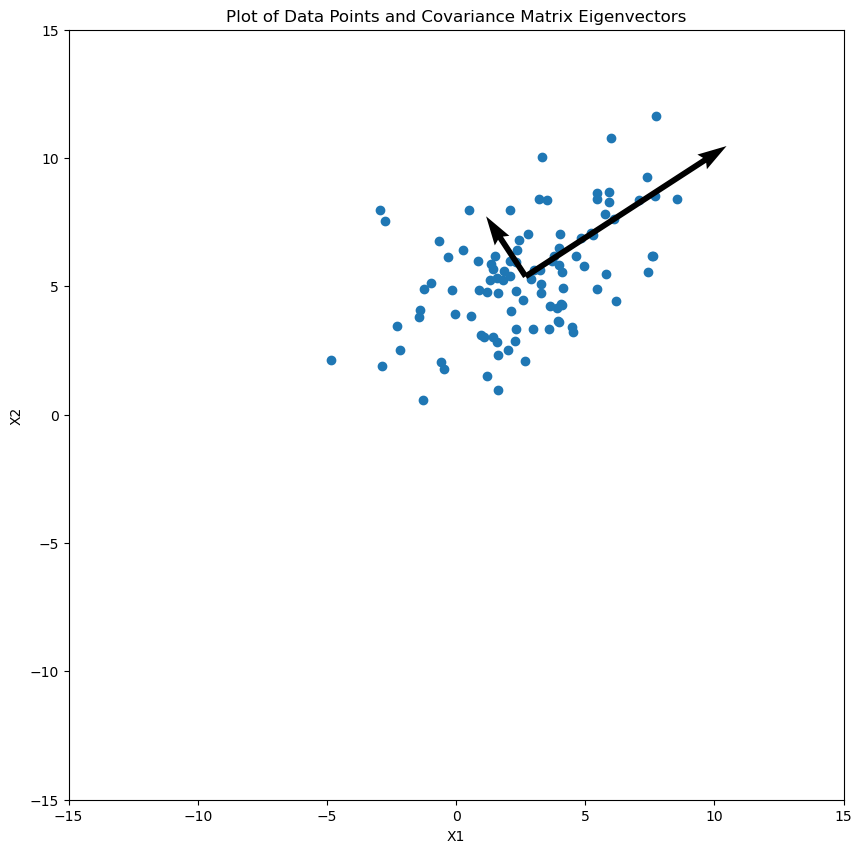

In [86]:
# Part 4: Plotting data points in standard basis
plt.figure(figsize=(10,10))
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.scatter(x=samples[:,0],y=samples[:,1])
plt.title("Plot of Data Points and Covariance Matrix Eigenvectors")
plt.xlabel("X1")
plt.ylabel("X2")

for i in range(len(eigenvalues)):
    eigenvector = eigenvectors[:, i]
    eigenvalue = eigenvalues[i]
    plt.quiver(sample_mean[0], sample_mean[1],
               eigenvector[0] * eigenvalue, eigenvector[1] * eigenvalue,
               angles='xy', scale_units='xy', scale=1)

plt.show();


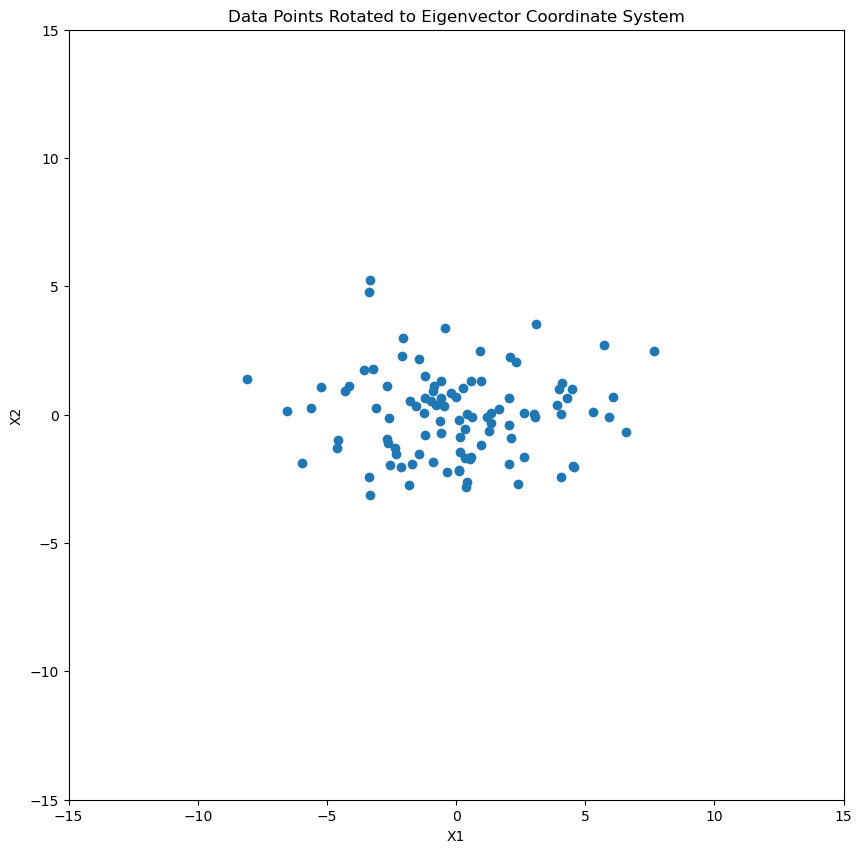

In [87]:
# Part 5: Plotting data points in eigen basis
rotated_data = np.dot(eigenvectors.T, deviations.T).T
plt.figure(figsize=(10,10))
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.scatter(rotated_data[:,0],rotated_data[:,1])
plt.title("Data Points Rotated to Eigenvector Coordinate System")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show();

**Question 8. Gaussian Classifiers for Digits and Spam**

First, load the  training and testing data using the function defined in load.py

In [14]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam"]:
        data = np.load(f"../data/{data_name}-data-hw3.npz")
        print("\nloaded %s data!" % data_name)
        fields = "training_data", "training_labels", "test_data"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
training_data (60000, 1, 28, 28)
training_labels (60000,)
test_data (10000, 1, 28, 28)

loaded spam data!
training_data (4171, 32)
training_labels (4171,)
test_data (1000, 32)


1. (Code) Taking pixel values as features (no new features yet, please), fit a Gaussian distribution to each digit class using maximum likelihood estimation.  This involves computing a mean and a covariance matrix for each digit class, as discussed in Lecture 9 and Section 4.4 of An ***Introduction to Statistical Learning***. Attach the relevant code as your answer to this part. ***Hint:*** You may, and probably should, contrast-normalize the images before using their pixel values. One way to normalize is to divide the pixel values of an image by the $\ell_2$-norm of its pixel values.

In [15]:
# Set a random seed for the rest of this question
np.random.seed(42)

# Load the MNIST dataset
mnist_data = np.load("../data/mnist-data-hw3.npz")
X_train = mnist_data["training_data"]  # (60000, 1, 28, 28)
y_train = mnist_data["training_labels"]  # (60000,)

# Reshape images into vectors (60000, 784)
X_train = X_train.reshape(60000, -1)

# Normalize by dividing each image by its L2 norm
X_train = X_train / np.linalg.norm(X_train, axis=1, keepdims=True)
labels = np.unique(y_train)

# Compute mean and covariance for each digit class
mnist_gaussian_fit = {}
for digit in labels:
    X_digit = X_train[y_train == digit]
    mean_digit = np.mean(X_digit, axis=0)
    cov_digit = np.cov(X_digit, rowvar=False) 
    mnist_gaussian_fit[digit] = (mean_digit, cov_digit)

2. Visualize the covariance matrix for a particular class (digit). Tell us which digit
and include your visualization in your write-up. How do the diagonal terms compare with the off-diagonal terms? What do you conclude from this?

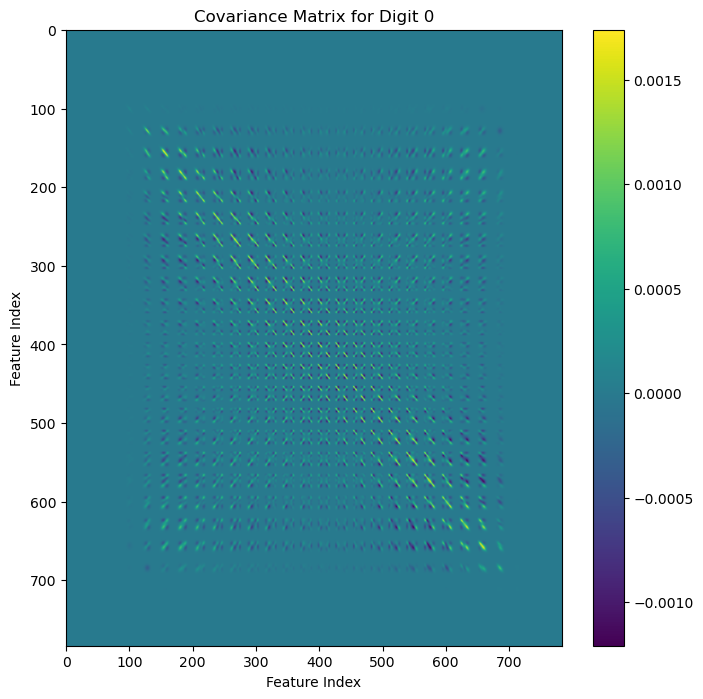

In [16]:
digit_to_visualize = 0
plt.figure(figsize=(8, 8))
plt.imshow(mnist_gaussian_fit[digit_to_visualize][1], aspect='auto')
plt.colorbar()
plt.title(f"Covariance Matrix for Digit {digit_to_visualize}")
plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
plt.show()

In this visualization, I have plotted the normalized covariance matrix of the digit 0. The diagonal terms appear to be larger in magnitude than the off-diagonal elements in general. The further away from the diagonals, the smaller the entries. From this we can conclude that pixels that are closer to each other are more highly correlated than pixels that are further apart.

In [17]:
def data_partitioning(data, labels, validation_size):
    num_data = len(labels)
    training_size = num_data - validation_size
    shuffled_indices = np.random.permutation(num_data)
    X_train = data[shuffled_indices][:training_size]
    X_val = data[shuffled_indices][training_size:]
    y_train = labels[shuffled_indices][:training_size]
    y_val = labels[shuffled_indices][training_size:]
    return X_train, X_val, y_train, y_val


In [18]:
import numpy as np
from scipy.linalg import solve
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# ============================== LDA FUNCTIONS ==============================

# We've already computed the class means and covariances for each digit 0-9. 
# Now compute the pooled within-class covariance matrix.
def compute_pooled_covariance(X_train, y_train, labels):
    pooled_cov = np.zeros((X_train.shape[1], X_train.shape[1]))  # Assuming X_train is (N, D)
    total_samples = X_train.shape[0]
    
    for label in labels:
        X_class = X_train[y_train == label]
        cov_class = np.cov(X_class, rowvar=False)
        n_class = X_class.shape[0]
        pooled_cov += (n_class - 1) * cov_class

    pooled_cov /= (total_samples - len(labels))  # Weighted average by class sizes
    return pooled_cov + np.eye(pooled_cov.shape[0]) * 1e-6

# Compute posterior probability for each class
def predict_lda(X, mean_dict, pooled_cov_inv, priors, labels):
    log_probs = []
    for label in labels:
        mean = mean_dict[label]
        # Use linear algebra to compute the quadratic form instead of directly computing the inverse of covariance
        diff = X - mean
        log_prob = -0.5 * np.sum(diff @ pooled_cov_inv * diff, axis=1)  # log of Gaussian PDF
        log_prob += np.log(priors[label])  # Prior log-probability
        log_probs.append(log_prob)
    
    return np.argmax(log_probs, axis=0)  # Predicted class based on the maximum log-probability

# Train LDA
def train_lda(X_train, y_train, labels):
    mean_dict = {}
    cov_pooled = compute_pooled_covariance(X_train, y_train, labels)
    pooled_cov_inv = solve(cov_pooled, np.eye(cov_pooled.shape[0]))  # Solve via linear system
    priors = {label: np.mean(y_train == label) for label in labels}
    
    for label in labels:
        mean_dict[label] = np.mean(X_train[y_train == label], axis=0)
    
    return mean_dict, pooled_cov_inv, priors

# Validation function to compute error rate
def validate_lda(X_train, y_train, X_val, y_val, labels):
    mean_dict, pooled_cov_inv, priors = train_lda(X_train, y_train, labels)
    y_pred = predict_lda(X_val, mean_dict, pooled_cov_inv, priors, labels)
    error_rate = 1 - np.mean(y_pred == y_val)
    return error_rate

# ============================== QDA FUNCTIONS ==============================

# Train QDA by computing means and covariance matrices per class
def train_qda(X_train, y_train, labels):
    mean_dict = {}
    cov_dict = {}
    priors = {}

    for label in labels:
        X_class = X_train[y_train == label]
        mean_dict[label] = np.mean(X_class, axis=0)
        cov_dict[label] = np.cov(X_class, rowvar=False)  # Class-specific covariance
        priors[label] = len(X_class) / len(y_train)  # Prior probability
    
    return mean_dict, cov_dict, priors

# Predict using QDA (log-likelihood-based classification)
def predict_qda(X, mean_dict, cov_dict, priors, labels):
    log_probs = []
    for label in labels:
        mean = mean_dict[label]
        cov = cov_dict[label]

        # Compute log likelihood using scipy's logpdf function (more stable)
        try:
            log_prob = multivariate_normal.logpdf(X, mean=mean, cov=cov)
        except np.linalg.LinAlgError:  
            # In case of singular matrix, regularize it
            cov += np.eye(cov.shape[0]) * 1e-6
            log_prob = multivariate_normal.logpdf(X, mean=mean, cov=cov)

        log_prob += np.log(priors[label])  # Add log prior
        log_probs.append(log_prob)
    
    return np.argmax(log_probs, axis=0)  # Predicted class based on max log-prob

# Validation function for QDA
def validate_qda(X_train, y_train, X_val, y_val, labels):
    mean_dict, cov_dict, priors = train_qda(X_train, y_train, labels)
    y_pred = predict_qda(X_val, mean_dict, cov_dict, priors, labels)
    error_rate = 1 - np.mean(y_pred == y_val)
    return error_rate

In [20]:
# ============================== Compute error rates for different training sizes ==============================
training_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
X_train_subset, X_val_subset, y_train_subset, y_val_subset = data_partitioning(X_train, y_train, validation_size=10000)

lda_errors = []
qda_errors = []
for size in training_sizes:
    # Randomly sample training data of the current size
    indices = np.random.choice(X_train.shape[0], size, replace=False)
    X_train_subset = X_train[indices]
    y_train_subset = y_train[indices]
    # LDA errors
    lda_error_rate = validate_lda(X_train_subset, y_train_subset, X_val_subset, y_val_subset, labels)
    lda_errors.append(lda_error_rate)
    # QDA errors
    qda_error_rate = validate_qda(X_train_subset, y_train_subset, X_val_subset, y_val_subset, labels)
    qda_errors.append(qda_error_rate)

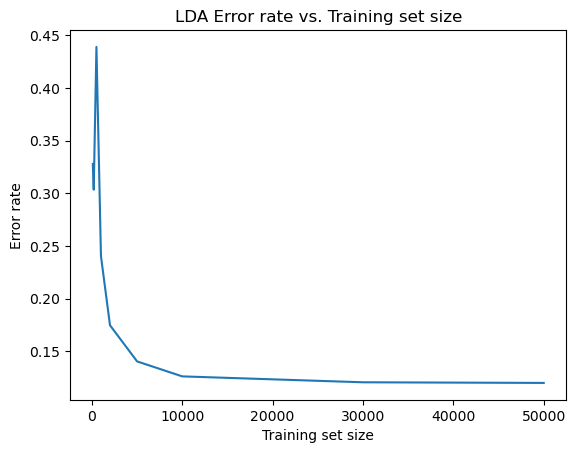

In [21]:
# Part 3(a): Plotting LDA error rates
plt.plot(training_sizes, lda_errors)
plt.title("LDA Error rate vs. Training set size")
plt.xlabel("Training set size")
plt.ylabel("Error rate")
plt.show()

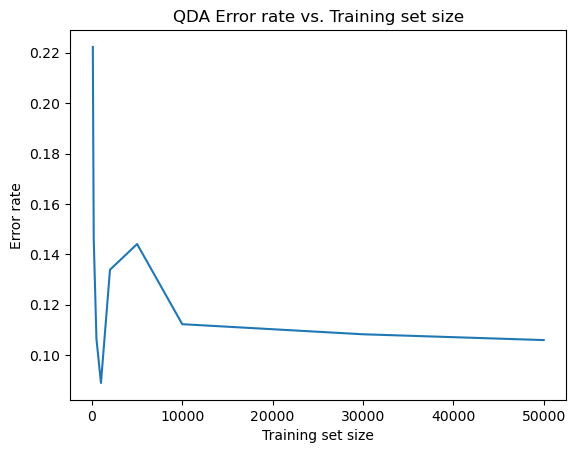

In [22]:
# Part 3(b): Plotting QDA error rates
plt.plot(training_sizes, qda_errors)
plt.title("QDA Error rate vs. Training set size")
plt.xlabel("Training set size")
plt.ylabel("Error rate")
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def train_lda(X_train, y_train, labels):
    """ Compute class means and shared covariance matrix for LDA """
    mean_dict = {}
    priors = {}
    
    # Compute class means
    for label in labels:
        X_class = X_train[y_train == label]
        mean_dict[label] = np.mean(X_class, axis=0)
        priors[label] = len(X_class) / len(y_train)
    
    # Compute shared covariance matrix (pooled)
    cov_pooled = np.zeros((X_train.shape[1], X_train.shape[1]))
    for label in labels:
        X_class = X_train[y_train == label]
        cov_pooled += (len(X_class) - 1) * np.cov(X_class, rowvar=False)
    
    cov_pooled /= (len(X_train) - len(labels))  # Pooled covariance
    cov_pooled += np.eye(cov_pooled.shape[0]) * 1e-6
    return mean_dict, cov_pooled, priors

def predict_lda(X, mean_dict, cov_pooled, priors, labels):
    """ Predict class using LDA """
    log_probs = []
    inv_cov = np.linalg.solve(cov_pooled, np.eye(cov_pooled.shape[0]))  # Solve instead of inverting
    
    for label in labels:
        mean = mean_dict[label]
        log_prob = -0.5 * np.dot((X - mean), inv_cov @ (X - mean).T).diagonal() + np.log(priors[label])
        log_probs.append(log_prob)
    
    return np.argmax(log_probs, axis=0)

def train_qda(X_train, y_train, labels):
    """ Compute class means and class-specific covariance matrices for QDA """
    mean_dict = {}
    cov_dict = {}
    priors = {}

    for label in labels:
        X_class = X_train[y_train == label]
        mean_dict[label] = np.mean(X_class, axis=0)
        cov_dict[label] = np.cov(X_class, rowvar=False)  
        priors[label] = len(X_class) / len(y_train)

    return mean_dict, cov_dict, priors

def predict_qda(X, mean_dict, cov_dict, priors, labels):
    """ Predict class using QDA """
    log_probs = []
    for label in labels:
        mean = mean_dict[label]
        cov = cov_dict[label]
        
        try:
            log_prob = multivariate_normal.logpdf(X, mean=mean, cov=cov)
        except np.linalg.LinAlgError:
            cov += np.eye(cov.shape[0]) * 1e-6  # Regularization
            log_prob = multivariate_normal.logpdf(X, mean=mean, cov=cov)
        
        log_prob += np.log(priors[label])
        log_probs.append(log_prob)

    return np.argmax(log_probs, axis=0)

def evaluate_error_rates(method, X_train, y_train, X_val, y_val, labels, training_sizes):
    """ Compute error rates for each digit separately using LDA or QDA """
    error_rates = {label: [] for label in labels}

    for size in training_sizes:
        indices = np.random.choice(X_train.shape[0], size, replace=False)
        X_train_subset, y_train_subset = X_train[indices], y_train[indices]

        if method == "LDA":
            mean_dict, cov_pooled, priors = train_lda(X_train_subset, y_train_subset, labels)
            y_pred = predict_lda(X_val, mean_dict, cov_pooled, priors, labels)
        elif method == "QDA":
            mean_dict, cov_dict, priors = train_qda(X_train_subset, y_train_subset, labels)
            y_pred = predict_qda(X_val, mean_dict, cov_dict, priors, labels)

        for label in labels:
            mask = (y_val == label)
            error_rates[label].append(np.mean(y_pred[mask] != y_val[mask]))

    return error_rates

# Define training sizes
training_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

# Compute error rates for LDA and QDA
lda_error_rates = evaluate_error_rates("LDA", X_train_subset, y_train_subset, X_val_subset, y_val_subset, labels, training_sizes)
qda_error_rates = evaluate_error_rates("QDA", X_train_subset, y_train_subset, X_val_subset, y_val_subset, labels, training_sizes)

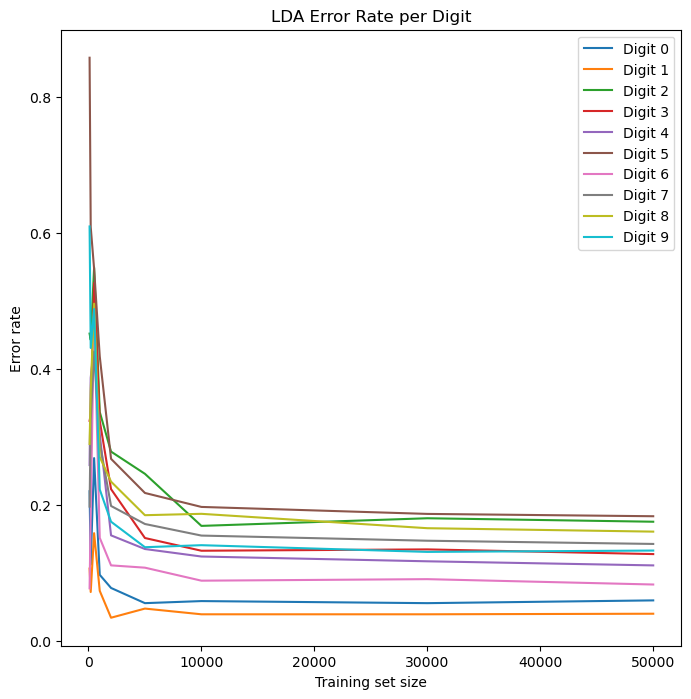

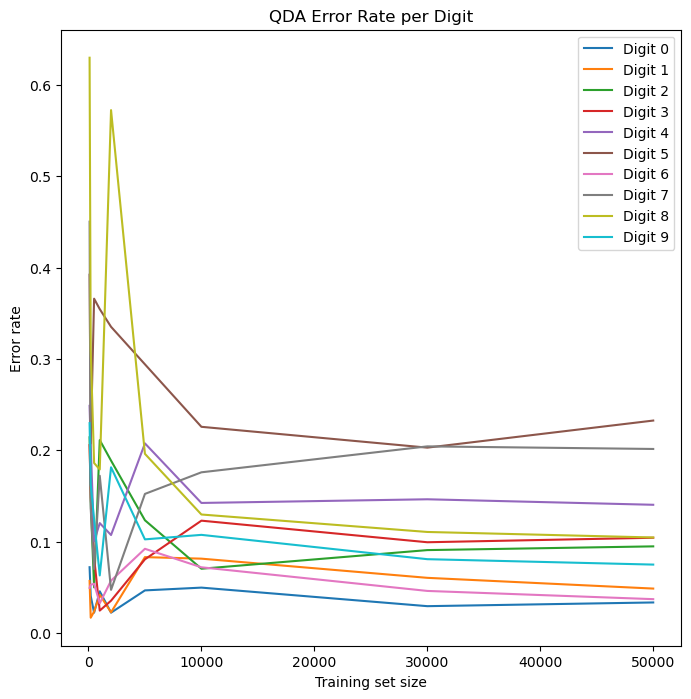

In [24]:
# Plot LDA error rates
plt.figure(figsize=(8, 8))
for label in labels:
    plt.plot(training_sizes, lda_error_rates[label], label=f"Digit {label}")
plt.xlabel("Training set size")
plt.ylabel("Error rate")
plt.title("LDA Error Rate per Digit")
plt.legend()
plt.show()

# Plot QDA error rates
plt.figure(figsize=(8, 8))
for label in labels:
    plt.plot(training_sizes, qda_error_rates[label], label=f"Digit {label}")
plt.xlabel("Training set size")
plt.ylabel("Error rate")
plt.title("QDA Error Rate per Digit")
plt.legend()
plt.show()

**Kaggle: MNIST**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

np.random.seed(42)
# Load dataset and partition into training/validation sets
def data_partitioning(data, labels, validation_size):
    num_data = len(labels)
    shuffled_indices = np.random.permutation(num_data)
    X_train = data[shuffled_indices][: -validation_size]
    X_val = data[shuffled_indices][-validation_size:]
    y_train = labels[shuffled_indices][: -validation_size]
    y_val = labels[shuffled_indices][-validation_size:]
    return X_train, y_train, X_val, y_val

# QDA Training
def train_qda(X_train, y_train, labels):
    mean_dict, cov_dict, priors = {}, {}, {}
    for label in labels:
        X_class = X_train[y_train == label]
        mean_dict[label] = np.mean(X_class, axis=0)
        cov_dict[label] = np.cov(X_class, rowvar=False)
        priors[label] = len(X_class) / len(y_train)
    return mean_dict, cov_dict, priors

# QDA Prediction
def predict_qda(X, mean_dict, cov_dict, priors, labels):
    log_probs = np.zeros((X.shape[0], len(labels)))

    for i, label in enumerate(labels):
        mean, cov = mean_dict[label], cov_dict[label]

        # Regularize singular covariance matrices
        try:
            log_prob = multivariate_normal.logpdf(X, mean=mean, cov=cov, allow_singular=True)
        except np.linalg.LinAlgError:
            cov += np.eye(cov.shape[0]) * 1e-6  # Regularization
            log_prob = multivariate_normal.logpdf(X, mean=mean, cov=cov, allow_singular=True)

        log_probs[:, i] = log_prob + np.log(priors[label])

    return np.argmax(log_probs, axis=1)

# Convert predictions to CSV
def results_to_csv(y_test, file_name):
    df = pd.DataFrame({'Category': y_test.astype(int)})
    df.index += 1  # Start index at 1
    df.to_csv(file_name, index_label='Id')

# Load the MNIST dataset
data_mnist = np.load("../data/mnist-data-hw3.npz")
training_data_mnist = data_mnist["training_data"].reshape(-1, 28 * 28)  # Flatten images
training_labels_mnist = data_mnist["training_labels"]
mnist_test_data = data_mnist["test_data"].reshape(-1, 28 * 28)  # Flatten test images

# Split dataset
X_train, y_train, X_val, y_val = data_partitioning(training_data_mnist, training_labels_mnist, validation_size=10000)

# Get digit labels
labels = np.unique(y_train)

# Train QDA
mean_dict, cov_dict, priors = train_qda(X_train, y_train, labels)

# Validate on validation set
y_val_pred = predict_qda(X_val, mean_dict, cov_dict, priors, labels)
validation_error = np.mean(y_val_pred != y_val)
print(f"QDA Validation Error: {validation_error:.4f}")

# Predict on test set
y_test_pred = predict_qda(mnist_test_data, mean_dict, cov_dict, priors, labels)

# Save test predictions
results_to_csv(y_test_pred, "kaggle_mnist_qda_predictions.csv")
print("Predictions saved to kaggle_mnist_qda_predictions.csv!")


QDA Validation Error: 0.1941
Predictions saved to kaggle_mnist_qda_predictions.csv!


**Kaggle: Spam and Ham**

In [43]:
# Reload datasets
data_spam = np.load(f"../data/spam-data.npz")
training_data_spam = data_spam["training_data"]
training_labels_spam = data_spam["training_labels"]
validation_size_spam = int(0.2 * training_data_spam.shape[0])
spam_test_data = data_spam["test_data"]

# Split dataset
np.random.seed(42)
X_train, y_train, X_val, y_val = data_partitioning(training_data_spam, training_labels_spam, validation_size=validation_size_spam)

# Get email labels
labels = np.unique(y_train)

# Train QDA
mean_dict, cov_dict, priors = train_qda(X_train, y_train, labels)

# Validate on validation set
spam_val_pred = predict_qda(X_val, mean_dict, cov_dict, priors, labels)
accuracy = np.mean(y_val == spam_val_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# Predict on test set, and convert the results to CSV
spam_test_pred = predict_qda(spam_test_data, mean_dict, cov_dict, priors, labels)
results_to_csv(spam_test_pred, "kaggle_spam_qda_predictions.csv")
print("Predictions saved to kaggle_spam_qda_predictions.csv!")

Validation Accuracy: 0.8082
Predictions saved to kaggle_spam_qda_predictions.csv!
